# Plot Correlation

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                # '/ccs/proj/cfd162/lcheung/amr-wind-frontend.lcc/'
                ]
import sys, os, shutil, io
for x in amrwindfedirs: sys.path.insert(1, x)

In [2]:
import postproengine as ppeng
import ruamel.yaml    
yaml = ruamel.yaml.YAML(typ='rt')
Loader= yaml.load
loaderkwargs = {}
dumperkwargs = {}

In [3]:
yamlstring="""
globalattributes:
  verbose: True
  udfmodules: 
  - spectrapoints.py
  executeorder:
  - correlate
  - plotcsv

correlate:
  - name: two-point correlation (AMR-Wind)
    ncfile: /pscratch/mlblayl/AWAKEN/Neutral_Precursor_Yaw/p_hub.nc
    group: plane
    timerange: [20000, 21000]
    iplane: 0
    probelength: 1000
    probelocationfunction: spectrapoints.probelocations
    plotprobept: True
    saveprefix: correlation
    integrallengthscale:
      savefile: lengthscale.yaml

plotcsv:
  - name: plotRij
    xlabel: xi [m]
    ylabel: '$R_{ij}(xi)$'
    title: 'Two point correlation'
    figsize: [5,4]
    legendopts: {'loc':'upper right'}
    #postplotfunc: spectrapoints.formatplot
    csvfiles:
    - {'file':'correlation.AVG_Rij.csv', 'xcol':'xi', 'ycol':'RijLong', 'lineopts':{'color':'b', 'lw':1, 'linestyle':'-', 'label':'Longitudinal'}}
    - {'file':'correlation.AVG_Rij.csv', 'xcol':'xi', 'ycol':'RijLat',  'lineopts':{'color':'r', 'lw':1, 'linestyle':'-', 'label':'Lateral'}}
"""
f = io.StringIO(yamlstring)
yamldict = Loader(f, **loaderkwargs)

Initialized correlate
Running correlate
/pscratch/mlblayl/AWAKEN/Neutral_Precursor_Yaw/p_hub.nc 2000
[============================================================] 100.0% 
Ncount = 2000

WS   = [6.247456808992582, 0.4725175182313794, 0.004645807062008791]
Wdir = 265.6747500310573
355.67
[============================================================] 100.0% 
Initialized integrallengthscale inside correlate
Executing integrallengthscale
LONG lengthscale = 135.555594
LAT lengthscale  = 39.250097
Initialized plotcsv
Running plotcsv


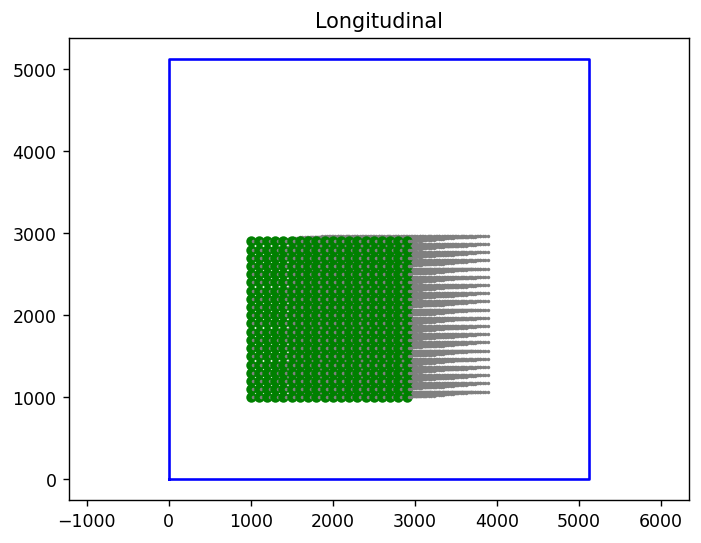

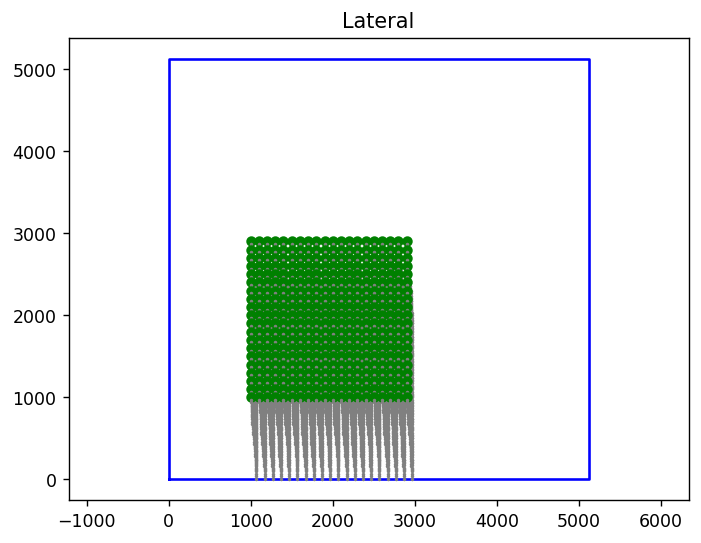

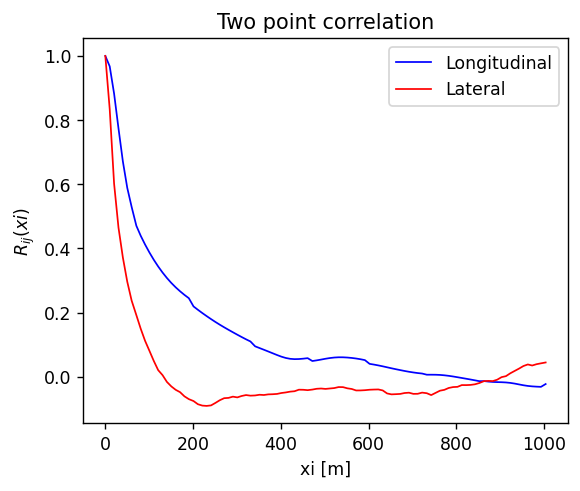

In [4]:
# Run the driver
ppeng.driver(yamldict)